## EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
# Removing unecessary columns for our analysis purposes
df = df.drop(['ID', 'oral'], axis=1)

# For Tartar, replacing "Y" with "1" and "N" with "0"
df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0}).astype(int)

# For Gender, replacing "F" with "1" and "M" with "0"
df['gender'] = df['gender'].replace({'F': 1, 'M': 0}).astype(int)

df

/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_4507/2614000815.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0}).astype(int)
/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_4507/2614000815.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'F': 1, 'M': 0}).astype(int)


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [5]:
# Even though we know all columns are non-null, we run this code to check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64


In [6]:
df.describe()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.364343,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288
std,0.481250,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000


In [7]:
# Mark all occurrences of duplicates (including the first one)
duplicates = df[df.duplicated(keep='first')]

# We inspect the duplicates
print(duplicates)

       gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
35593       1   40         165          65       84.8             1.2   
44553       0   80         160          65       91.0             0.9   
44554       0   30         165          90       98.0             1.5   
44555       0   40         170          75       81.0             1.5   
44556       0   35         175          70       80.0             1.0   
...       ...  ...         ...         ...        ...             ...   
55687       1   40         170          65       75.0             0.9   
55688       1   45         160          50       70.0             1.2   
55689       1   55         160          50       68.5             1.0   
55690       0   60         165          60       78.0             0.8   
55691       0   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...    LDL  \
35593              1.2            1.0       

In [8]:
# Removing 11140 rows of duplicates (reducing from 55692 to 44552 entries)
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44552 entries, 0 to 44552
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44552 non-null  int64  
 1   age                  44552 non-null  int64  
 2   height(cm)           44552 non-null  int64  
 3   weight(kg)           44552 non-null  int64  
 4   waist(cm)            44552 non-null  float64
 5   eyesight(left)       44552 non-null  float64
 6   eyesight(right)      44552 non-null  float64
 7   hearing(left)        44552 non-null  float64
 8   hearing(right)       44552 non-null  float64
 9   systolic             44552 non-null  float64
 10  relaxation           44552 non-null  float64
 11  fasting blood sugar  44552 non-null  float64
 12  Cholesterol          44552 non-null  float64
 13  triglyceride         44552 non-null  float64
 14  HDL                  44552 non-null  float64
 15  LDL                  44552 non-null  floa

In [9]:
# Removing N/A
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44552 entries, 0 to 44552
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44552 non-null  int64  
 1   age                  44552 non-null  int64  
 2   height(cm)           44552 non-null  int64  
 3   weight(kg)           44552 non-null  int64  
 4   waist(cm)            44552 non-null  float64
 5   eyesight(left)       44552 non-null  float64
 6   eyesight(right)      44552 non-null  float64
 7   hearing(left)        44552 non-null  float64
 8   hearing(right)       44552 non-null  float64
 9   systolic             44552 non-null  float64
 10  relaxation           44552 non-null  float64
 11  fasting blood sugar  44552 non-null  float64
 12  Cholesterol          44552 non-null  float64
 13  triglyceride         44552 non-null  float64
 14  HDL                  44552 non-null  float64
 15  LDL                  44552 non-null  floa

/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_4507/3269984038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
# Showing potential outliers in ALT parameter
df[df['ALT'] > 1000]

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
5682,1,55,145,40,73.0,1.2,1.0,2.0,1.0,100.0,...,66.0,15.1,1.0,1.0,1311.0,2062.0,103.0,0,1,0
6776,0,50,175,70,83.5,0.8,1.5,1.0,1.0,102.0,...,56.0,14.2,1.0,1.2,841.0,1783.0,140.0,0,1,1
11011,0,35,170,75,93.0,1.0,0.9,1.0,1.0,120.0,...,79.0,14.8,3.0,0.9,250.0,1612.0,138.0,1,1,0
11125,1,45,155,65,86.0,0.9,0.9,1.0,1.0,110.0,...,112.0,13.7,3.0,0.6,1090.0,1400.0,276.0,0,0,0
14615,0,35,170,65,86.0,1.0,1.0,1.0,1.0,124.0,...,59.0,17.2,1.0,0.9,981.0,1155.0,355.0,1,0,1
15496,1,55,155,55,74.0,1.0,1.0,1.0,1.0,110.0,...,179.0,13.2,1.0,0.9,545.0,1504.0,404.0,0,0,0
29543,0,60,170,70,91.5,1.2,1.2,2.0,2.0,117.0,...,77.0,14.1,1.0,1.4,31.0,2914.0,2.0,0,1,0


In [11]:
# Doing some research, we understood that ALT range is 4 to 36 and occasionally can reach 1000. So we identified and deleted 7 rows that are above 1000.
df = df[df['ALT'] <= 1000]

In [12]:
# Showing potential outliers in LDL parameter
df[df['LDL'] > 500]

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
4623,0,55,160,70,90.3,1.0,1.0,1.0,1.0,123.0,...,790.0,15.8,1.0,0.9,24.0,33.0,29.0,0,1,1
6329,0,40,165,60,82.4,0.5,0.5,1.0,1.0,109.0,...,910.0,15.3,1.0,1.0,32.0,70.0,43.0,0,0,1
9646,0,45,170,65,82.8,1.2,1.2,1.0,1.0,138.0,...,1340.0,17.2,1.0,1.2,16.0,15.0,20.0,0,1,0
11736,0,50,175,70,83.1,0.9,0.9,1.0,1.0,110.0,...,1010.0,16.4,1.0,0.9,19.0,21.0,27.0,0,0,0
17085,0,35,175,80,94.1,1.0,0.9,1.0,1.0,134.0,...,1600.0,15.1,1.0,1.1,38.0,65.0,147.0,1,0,1
20452,1,40,150,50,77.2,1.0,0.9,1.0,1.0,128.0,...,1560.0,14.3,1.0,0.8,17.0,19.0,25.0,1,1,0
22270,0,40,170,70,85.4,0.6,0.4,1.0,1.0,105.0,...,1400.0,16.1,1.0,1.2,19.0,16.0,63.0,0,1,1
22709,0,55,160,50,69.8,0.7,0.7,1.0,1.0,94.0,...,1860.0,14.3,1.0,1.1,20.0,15.0,19.0,1,1,1
22894,1,55,150,45,73.7,1.2,1.2,1.0,1.0,118.0,...,1660.0,14.7,1.0,0.7,22.0,13.0,13.0,0,0,0
26244,1,40,160,55,76.6,1.2,1.2,1.0,1.0,96.0,...,800.0,13.2,2.0,0.8,21.0,15.0,11.0,0,1,0


In [13]:
# Doing some research, we understood that LDL range is commonly 100 to 200. So we identified and deleted 18 rows that are above 400.
df = df[df['LDL'] <= 400]

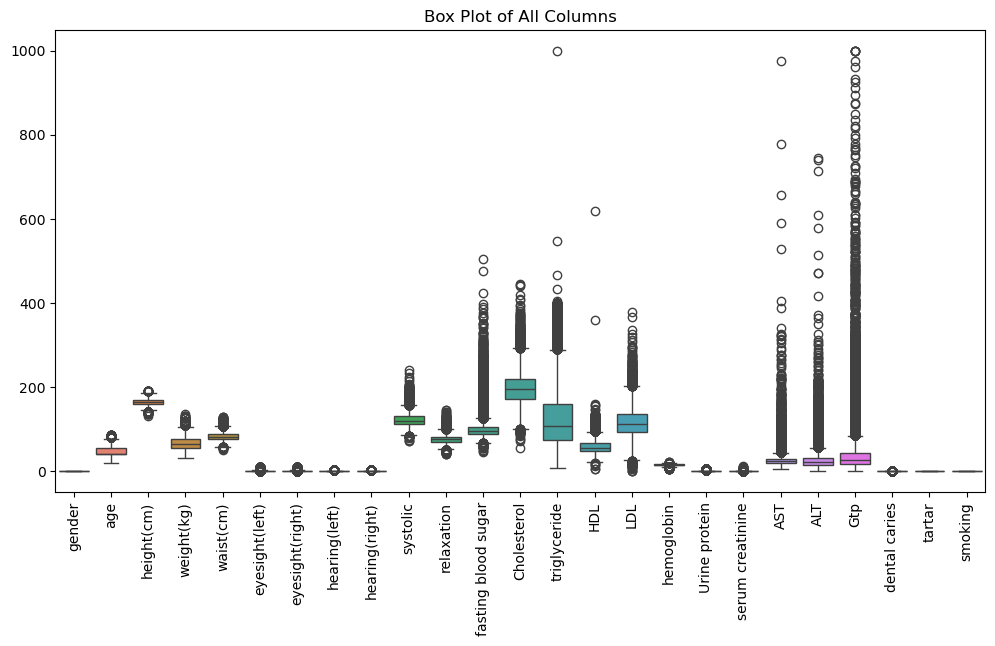

In [14]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of All Columns')
plt.show()

In [15]:
# Scaling the data to improve the accuracy of the data analysis and algorithm training

# Separate the categorical columns (we don't scale them)
df_gender= df['gender']
df_age= df['age']
df_urine = df['Urine protein']
df_caries = df['dental caries']
df_tartar = df['tartar']
df_smoking= df['smoking']

df_data = df.drop(columns=['gender', 'age', 'Urine protein', 'dental caries', 'tartar', 'smoking'])

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data)
scaled_df = pd.DataFrame(df_scaled, columns=df_data.columns)

# Add back the categorical columns
scaled_df['gender'] = df_gender
scaled_df['age'] = df_age
scaled_df['Urine protein'] = df_urine
scaled_df['dental caries'] = df_caries
scaled_df['tartar'] = df_tartar
scaled_df['smoking'] = df_smoking

scaled_df = scaled_df.dropna()

scaled_df['gender'] = scaled_df['gender'].astype(int)
scaled_df['age'] = scaled_df['age'].astype(int)
scaled_df['Urine protein'] = scaled_df['Urine protein'].astype(int)
scaled_df['dental caries'] = scaled_df['dental caries'].astype(int)
scaled_df['tartar'] = scaled_df['tartar'].astype(int)
scaled_df['smoking'] = scaled_df['smoking'].astype(int)

scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44501 entries, 0 to 44526
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height(cm)           44501 non-null  float64
 1   weight(kg)           44501 non-null  float64
 2   waist(cm)            44501 non-null  float64
 3   eyesight(left)       44501 non-null  float64
 4   eyesight(right)      44501 non-null  float64
 5   hearing(left)        44501 non-null  float64
 6   hearing(right)       44501 non-null  float64
 7   systolic             44501 non-null  float64
 8   relaxation           44501 non-null  float64
 9   fasting blood sugar  44501 non-null  float64
 10  Cholesterol          44501 non-null  float64
 11  triglyceride         44501 non-null  float64
 12  HDL                  44501 non-null  float64
 13  LDL                  44501 non-null  float64
 14  hemoglobin           44501 non-null  float64
 15  serum creatinine     44501 non-null  floa

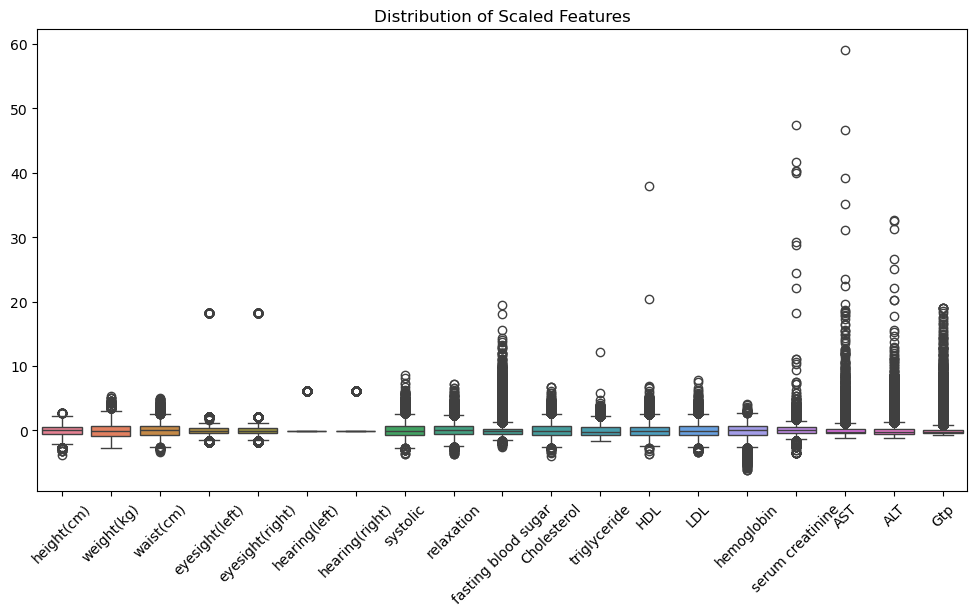

In [16]:
# Visualize the box plot of scaled dataframe
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.xticks(range(len(df_data.columns)), df_data.columns, rotation=45)
plt.title('Distribution of Scaled Features')
plt.show()

# Note: While outliers are present, they were deemed plausible after 
# researching body parameter's possible values.

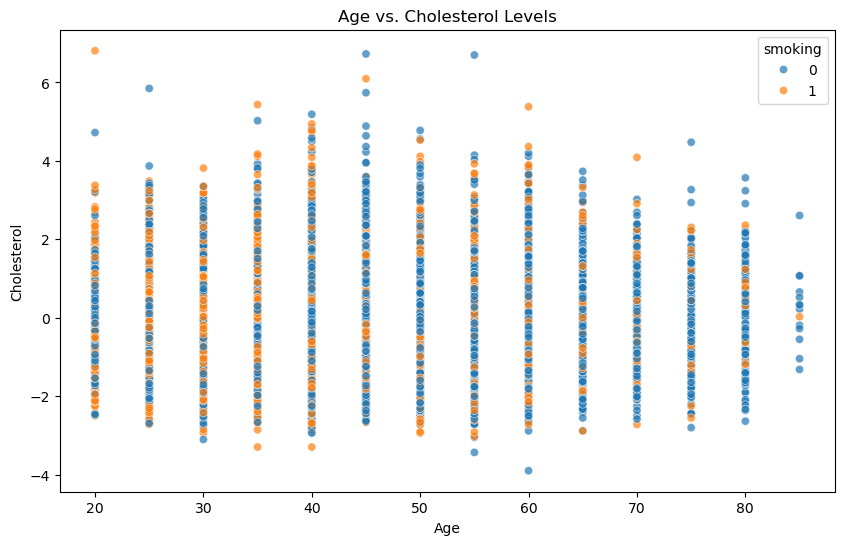

In [17]:
# Visualizing how age, cholesterol, and smoking are distributed.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Cholesterol', data=scaled_df, hue='smoking', alpha=0.7)
plt.title('Age vs. Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# No evident pattern in the distribution of smoking based on age or cholesterol
# We only see that smoking is more frequent in younger people (many orange dots) and less frequent in older people (many blue dots)

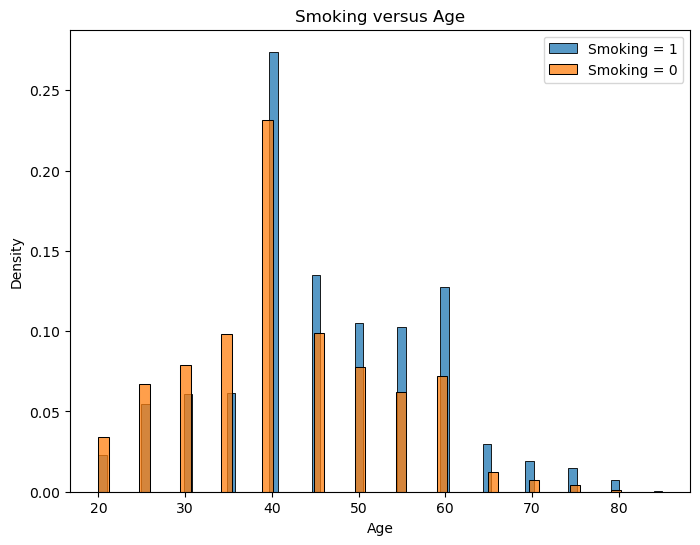

In [18]:
# Barplot showing how age is distributed, based on smokers and non-smokers subsets. 

plt.figure(figsize=(8, 6))
sns.histplot(scaled_df[scaled_df['smoking'] == 0]["age"], label='Smoking = 1', stat='density')
sns.histplot(scaled_df[scaled_df['smoking'] == 1]["age"], label='Smoking = 0', stat='density')
plt.title('Smoking versus Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Smoking is more frequent in people of 40 years and over

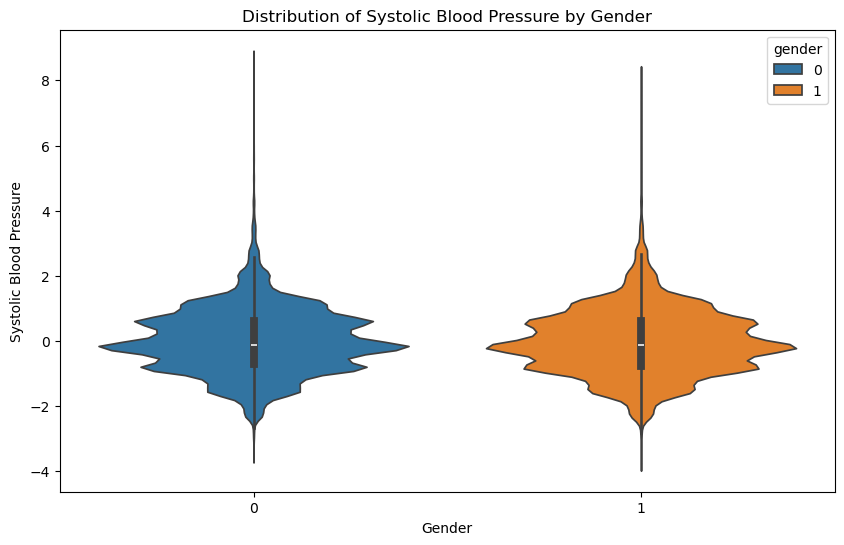

In [19]:
# Visualizing the violin plot of Systolic Blood Pressure and Gender (0 = Male; 1 = Female) 

plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='systolic', data=scaled_df, hue='gender')
plt.title('Distribution of Systolic Blood Pressure by Gender')
#plt.legend(title='gender', labels=['Men', 'Women'])
plt.xlabel('Gender')
plt.ylabel('Systolic Blood Pressure')
plt.show()

# The distribution of systolic blood pressure appears to be similar for both genders,
# with no significant differences in the overall spread or central tendency.

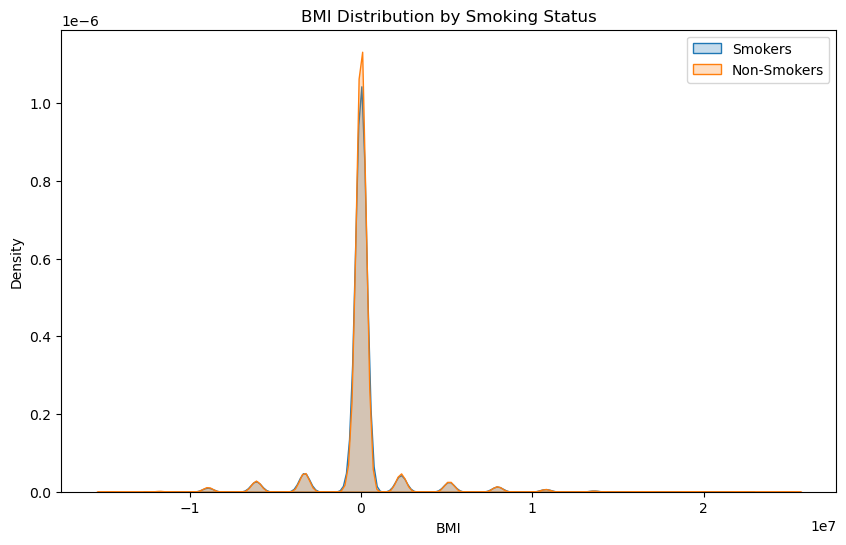

In [20]:
# Visualizing how BMI is distributed, based on smokers and non-smokers subsets. 

scaled_df['BMI'] = scaled_df['weight(kg)'] / (scaled_df['height(cm)'] / 100) ** 2
 
plt.figure(figsize=(10, 6))
sns.kdeplot(scaled_df[scaled_df['smoking'] == 1]['BMI'], label='Smokers', fill=True)
sns.kdeplot(scaled_df[scaled_df['smoking'] == 0]['BMI'], label='Non-Smokers', fill=True)
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('BMI')
plt.legend()
plt.show()

# The distribution for both Smokers and Non-Smokers is highly concentrated around the middle.

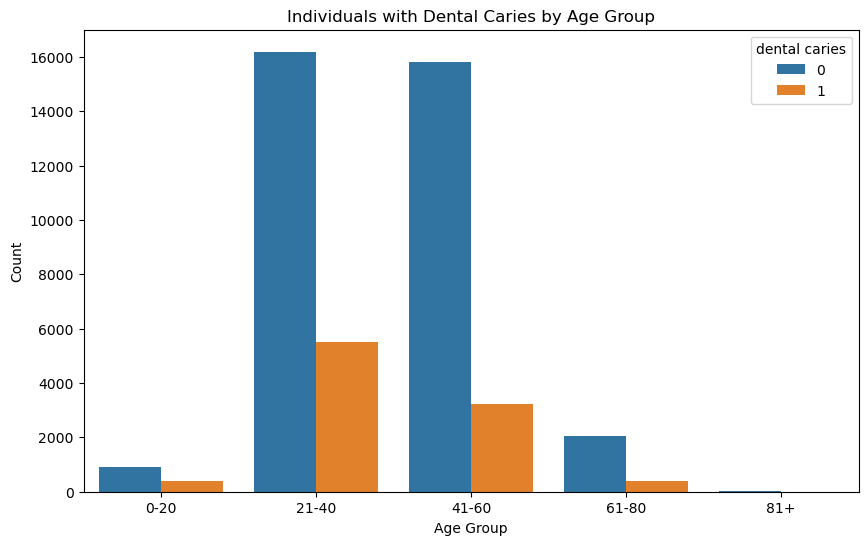

In [21]:
# Barplot showing how dental caries is distributed in different age groups, or buckets

scaled_df['age_group'] = pd.cut(scaled_df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])
 
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='dental caries', data=scaled_df)
plt.title('Individuals with Dental Caries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# The proportion of individuals with dental caries is highest in the 0-20 and 21-40 age groups.
# It shows a noticeable decline in the older age groups,
# suggesting that younger individuals are more affected by dental caries compared to older ones.

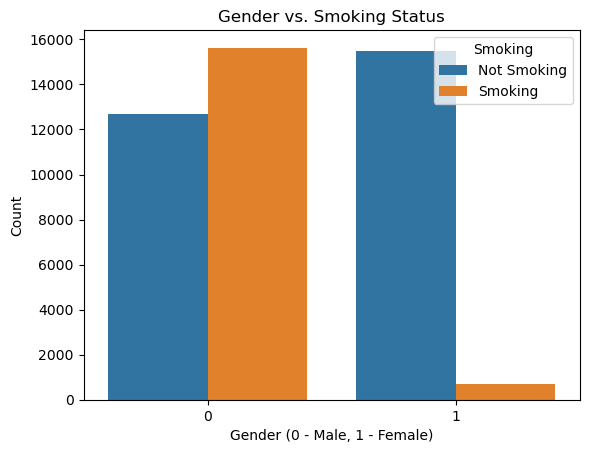

In [22]:
# Barplot showing how smoking status differs according to gender

plot = sns.countplot(data=scaled_df, x='gender', hue='smoking')

plt.xlabel('Gender (0 - Male, 1 - Female)')
plt.ylabel('Count')
plt.title('Gender vs. Smoking Status')

plt.legend(title='Smoking', labels=['Not Smoking', 'Smoking'])

plt.show()

# Smokers are predominantly Males

In [23]:
# Heatmap of correlations between the variables

scaled_df = scaled_df.drop(['age_group'], axis=1)
scaled_df.corr().style.background_gradient(cmap = "coolwarm")

# Strong positive correlation between:
# - Cholesterol and LDL
# - waist(cm) and weight(kg),
# - relaxation and systolic,
# - height(cm) and weight(kg)

,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,gender,age,Urine protein,dental caries,tartar,smoking,BMI
height(cm),1.000000,0.675802,0.379181,0.152023,0.156566,-0.080504,-0.077878,0.081390,0.115091,0.016347,-0.082633,0.155914,-0.210293,-0.058586,0.537594,0.373767,0.055332,0.180964,0.140256,-0.076271,-0.055145,-0.003165,0.013176,0.010485,0.040951,0.002887
weight(kg),0.675802,1.000000,0.823190,0.108523,0.112698,-0.051334,-0.052306,0.265174,0.271206,0.135364,0.024490,0.322729,-0.355047,0.050023,0.489336,0.314423,0.149253,0.355514,0.209552,-0.062962,-0.042708,0.002899,0.005495,0.007039,0.031009,0.309021
waist(cm),0.379181,0.823190,1.000000,0.027719,0.035927,0.022754,0.019071,0.315491,0.291164,0.211716,0.062525,0.360812,-0.371237,0.082891,0.382015,0.225657,0.171146,0.351754,0.242264,-0.043924,-0.010325,0.003239,-0.001880,0.004209,0.020663,0.325156
eyesight(left),0.152023,0.108523,0.027719,1.000000,0.368958,-0.051986,-0.053552,-0.019185,0.004099,-0.044455,-0.008979,0.020204,-0.018174,-0.010456,0.095620,0.074233,-0.006608,0.029124,0.004559,-0.012117,-0.025078,-0.002120,0.008205,0.002123,0.014324,0.014895
eyesight(right),0.156566,0.112698,0.035927,0.368958,1.000000,-0.045718,-0.047573,-0.015705,0.008817,-0.044795,-0.010035,0.021923,-0.022472,-0.009817,0.096446,0.047634,-0.007519,0.032715,0.012126,-0.005619,-0.027142,-0.001926,0.010866,-0.002930,0.006571,0.013046
hearing(left),-0.080504,-0.051334,0.022754,-0.051986,-0.045718,1.000000,0.506452,0.057288,0.010987,0.042681,-0.024572,0.003821,-0.020472,-0.019053,-0.028933,0.002318,0.012373,-0.018183,0.010714,0.007407,0.018017,-0.003170,0.001046,-0.007558,-0.005811,-0.006820
hearing(right),-0.077878,-0.052306,0.019071,-0.053552,-0.047573,0.506452,1.000000,0.051436,0.003951,0.041105,-0.024392,0.001359,-0.020412,-0.017518,-0.030560,0.010027,0.011759,-0.020510,0.006760,-0.005352,0.023187,0.001131,-0.005601,-0.004402,0.001753,-0.008598
systolic,0.081390,0.265174,0.315491,-0.019185,-0.015705,0.057288,0.051436,1.000000,0.761379,0.172170,0.057223,0.197017,-0.085863,0.017641,0.184128,0.071156,0.105824,0.141460,0.165560,-0.018997,0.015042,0.006326,-0.002739,-0.002812,0.008761,0.126915
relaxation,0.115091,0.271206,0.291164,0.004099,0.008817,0.010987,0.003951,0.761379,1.000000,0.148636,0.094770,0.215222,-0.086657,0.051688,0.232803,0.082553,0.104709,0.155841,0.177440,-0.020011,0.001533,0.005657,-0.003609,-0.003286,0.012784,0.121897
fasting blood sugar,0.016347,0.135364,0.211716,-0.044455,-0.044795,0.042681,0.041105,0.172170,0.148636,1.000000,0.010920,0.227697,-0.120727,-0.028718,0.098817,0.039387,0.085869,0.131028,0.179243,-0.002388,0.025334,0.012119,-0.000291,0.002466,-0.000156,0.072591


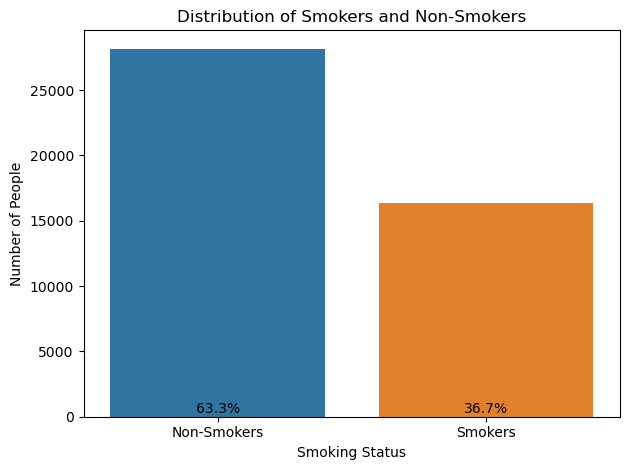

In [24]:
# The models we will train aim to predict smoking status (smoker or non-smoker) 
# based on other patient characteristics. To ensure these models are effective 
# and reflect real-world scenarios, the dataset should be balanced. This means having 
# a roughly equal number of people in each smoking category.

# This code block visualizes the distribution of smokers and non-smokers in our dataset 
# using a bar chart. An imbalanced dataset would be evident by a significant 
# difference in the bar heights.
scaled_df['smoking_label'] = scaled_df['smoking'].map({1: 'Smokers', 0: 'Non-Smokers'})
smoking_counts = scaled_df['smoking_label'].value_counts()

# Calculate percentages of smokers vs non-smokers
total_samples = len(scaled_df)
percentages = smoking_counts / total_samples * 100

# Add percentage labels to the bars
for i, p in enumerate(percentages):
    plt.text(i, p, f'{p:.1f}%', ha='center', va='bottom')

sns.barplot(x=smoking_counts.index, hue=smoking_counts.index, y=smoking_counts.values, palette=['#1f77b4', '#ff7f0e'], legend=False)

plt.xlabel('Smoking Status')
plt.ylabel('Number of People')
plt.title('Distribution of Smokers and Non-Smokers')
plt.tight_layout()
plt.show()

# A dataset would be:
# - extreme imbalanced if the minority class is < 1% of the dataset
# - moderate imbalanced if the minority class is 1-20% of the dataset
# - mild imbalanced if the minority class is 20-40% of the dataset
# Therefore, our dataset is mildly imbalanced

## FIRST CLASSIFICATION ALGORITHM: DECISION TREE

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# The target column is "smoking" is our "y" because we want our model to predict
# if a person is a smoker or non-smoker based on some physical parameters
scaled_df = scaled_df.drop(['hearing(left)', 'hearing(right)', 'eyesight(left)', 'eyesight(right)', 'Urine protein', 'waist(cm)', 'height(cm)', 'systolic', 'dental caries', 'relaxation', 'fasting blood sugar', 'triglyceride', 'HDL', 'LDL', 'serum creatinine', 'AST', 'Gtp', 'smoking_label'], axis=1)
scaled_df_y = scaled_df['smoking']
scaled_df_x = scaled_df.drop(['smoking'], axis=1)

# n_features: This variable is assigned the number of features in our dataset. 
# n_classes: This variable is assigned an array containing the unique classes or labels found in our target variable y
n_features, n_classes = scaled_df_x.shape[1], np.unique(scaled_df_y)

n_features, n_classes

(8, array([0, 1]))

In [27]:
# train_test_split is used to split features X and target variable y into training and testing sets
# test_size parameter specifies the proportion of the data allocated for the testing set, which is set to 20% in this case.
# X_train: This variable contains the feature data for the training set.
# X_test: This variable contains the feature data for the testing set.
# y_train: This variable contains the target labels for the training set.
# y_test: This variable contains the target labels for the testing set.
X_train, X_test, y_train, y_test = train_test_split(scaled_df_x, scaled_df_y, test_size=0.2, random_state=42, stratify=scaled_df_y)

# Print the shapes of the training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35600, 8) (35600,) (8901, 8) (8901,)


In [28]:
# A Decision Tree classifier model is created and assigned to the variable "dt"
# random_state parameter is set to 42 ensures that the model's behavior is consistent and reproducible
# meaning we will get the same results when we run the code multiple times with the same random_state value
dt = DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=5000, random_state=42)

# Train the Decision Tree classifier model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=5000,
                       random_state=42)

In [29]:
# Calculate and print the accuracy of the Decision Tree classifier model on the training set
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))

# Calculate and print the accuracy of the Decision Tree classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.724
Accuracy on test set: 0.731


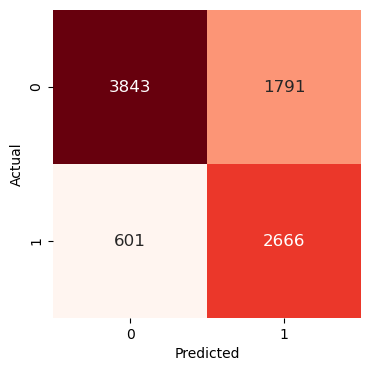

In [30]:
from sklearn.metrics import confusion_matrix

# The Decision Tree classifier model (dt) is used to make predictions on the feature data from the testing dataset (X_test)
y_prediction = dt.predict(X_test)

# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (y_prediction)
cm = confusion_matrix(y_test, y_prediction)

# Creates a Pandas DataFrame df_cm to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

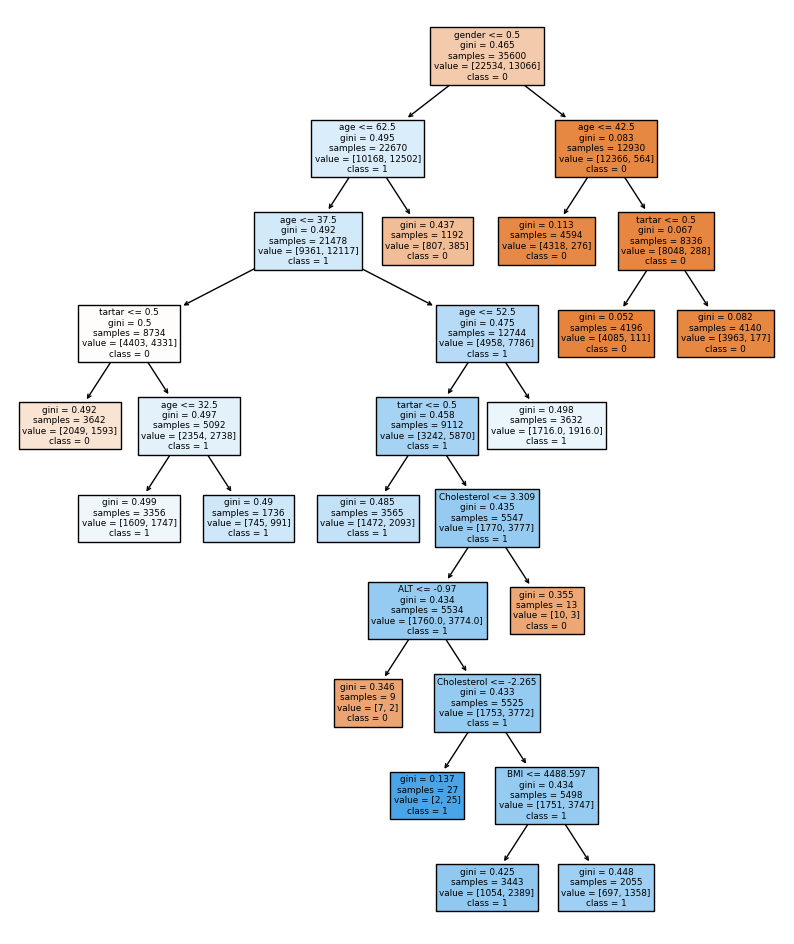

In [31]:
from sklearn import tree

# Create and display a visual representation of a decision tree model using the matplotlib.pyplot library

fig = plt.figure(figsize=(10,12))

# Convert class names to strings
class_names = list(map(str, scaled_df['smoking'].unique()))

tree.plot_tree(dt, feature_names=list(scaled_df_x.columns), class_names=class_names, filled=True)

# Display the created decision tree visualization
plt.show()

In [32]:
# A new Decision Tree classifier model is created and assigned to the variable dt_maxlength
# max_depth=3: The max_depth parameter controls the maximum depth of the decision tree
dt_maxlength = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the dt_maxlength
dt_maxlength.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
# Calculate and print the accuracy of the Decision Tree classifier model on the training set
print("Accuracy on training set: {:.3f}".format(dt_maxlength.score(X_train, y_train)))

# Calculate and print the accuracy of the Decision Tree classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(dt_maxlength.score(X_test, y_test)))

Accuracy on training set: 0.712
Accuracy on test set: 0.722


## SECOND CLASSIFICATION ALGORITHM: SUPPORT VECTOR MACHINE

In [35]:
# Import the SVC class from the sklearn.svm module
from sklearn.svm import SVC

# New variable X is created to store the feature variables for our machine learning model
# We drop smoking because it is our target but we also drop some other columns due to computational limits
X = scaled_df.drop(['smoking', 'BMI', 'tartar', 'hemoglobin', 'gender', 'age', ], axis=1) 
X = X.round(4)
X

,weight(kg),Cholesterol,ALT
0,-0.4588,0.4942,-0.3553
1,-0.4588,-0.1374,-0.3553
2,-0.4588,1.2356,-0.4918
3,0.3209,3.4324,-0.0368
4,-0.4588,-0.3570,-0.5828
...,...,...,...
44522,-0.0690,-0.4120,1.0097
44523,0.3209,-0.2747,-0.5828
44524,0.3209,-1.4280,-0.3553
44525,1.8804,-0.4943,1.0097


In [36]:
# A new variable y is created to store the target variable (class labels) for your machine learning model
y = scaled_df['smoking']
y

0        0
1        0
2        1
3        0
4        0
        ..
44522    0
44523    1
44524    0
44525    0
44526    1
Name: smoking, Length: 44501, dtype: int64

In [37]:
# n_features: This variable is assigned the number of features in our dataset. 
# n_classes: This variable is assigned an array containing the unique classes or labels found in our target variable y
n_features, n_classes = X.shape[1], np.unique(y)

n_features, n_classes

(3, array([0, 1]))

In [38]:
# Limit the dataset to 10000 randomly sampled rows due to computational limits
X_sampled = X.sample(n=10000, random_state=42)
y_sampled = y[X_sampled.index]  # Select corresponding y values

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled)

# Print the shapes of the training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 3) (8000,) (2000, 3) (2000,)


In [39]:
# Create a Support Vector Machine (SVM) classifier with a linear kernel using the SVC class
# kernel='linear': Specifies the type of kernel function to be used, in this case, 'linear' indicates a linear kernel
# random_state=42: Sett a random state ensures reproducibility
svm_linear = SVC(kernel='linear', random_state=42)

# Train the Support Vector Machine (SVM) classifier model on the training data
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [40]:
# Calculate and print the accuracy of the SVM classifier model on the training set
print("Accuracy on training set: {:.3f}".format(svm_linear.score(X_train, y_train)))

# Calculate and print the accuracy of the SVM classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(svm_linear.score(X_test, y_test)))

Accuracy on training set: 0.631
Accuracy on test set: 0.630


In [41]:
# Hyperparameter tuning. This code will require few moments to run
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': ['scale', 'auto'],     # Kernel coefficient
    'kernel': ['linear', 'rbf']     # Kernel type
}

# Create an SVM model
svm = SVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.3s
[CV] END ...................C=0.1, gamma=auto, k

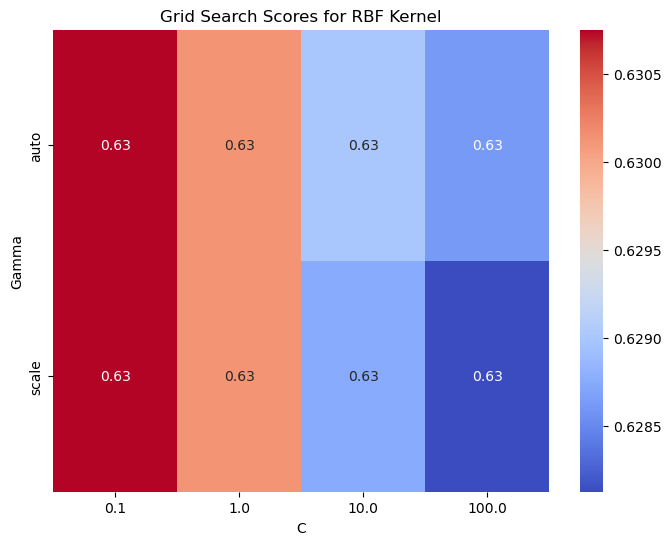

In [154]:
# Extract the grid search results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Filter the results for the RBF kernel, plotting C vs Gamma
rbf_results = results[results['param_kernel'] == 'rbf']

# Pivot the table to make 'C' as the x-axis and 'gamma' as the y-axis
scores_matrix = rbf_results.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

# Plotting the heatmap for 'C' vs 'gamma' accuracy
plt.figure(figsize=(8, 6))
plt.title("Grid Search Scores for RBF Kernel")
sns.heatmap(scores_matrix, annot=True, cmap='coolwarm')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()

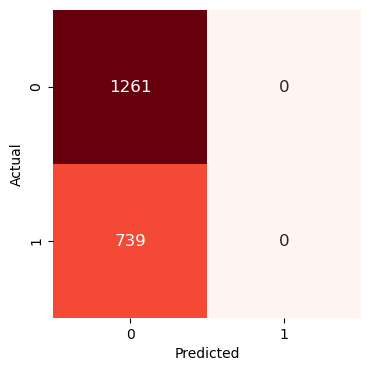

In [43]:
# Confusion matrix
# The SVC classifier model (svm_linear) is used to make predictions on the feature data from the testing dataset (X_test)
y_prediction_linear = svm_linear.predict(X_test)

# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (y_prediction_linear)
cm_linear = confusion_matrix(y_test, y_prediction_linear)

# Creates a Pandas DataFrame df_cm_linear to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm_linear = pd.DataFrame(cm_linear, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm_linear.index.name = 'Actual'
df_cm_linear.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm_linear: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sns.heatmap(df_cm_linear, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

## THIRD CLASSIFICATION ALGORITHM: KNN

In [45]:
# New variable X is created to store the feature variables for our machine learning model.
# We drop smoking because it is our target

X = df.drop('smoking', axis=1)
y = df['smoking']

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test are defined and can be used

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the model using the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_knn = knn.predict(X_test)

# Print the classification report
print("K-Nearest Neighbors Classification Report")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      5659
           1       0.58      0.55      0.56      3247

    accuracy                           0.69      8906
   macro avg       0.67      0.66      0.66      8906
weighted avg       0.69      0.69      0.69      8906



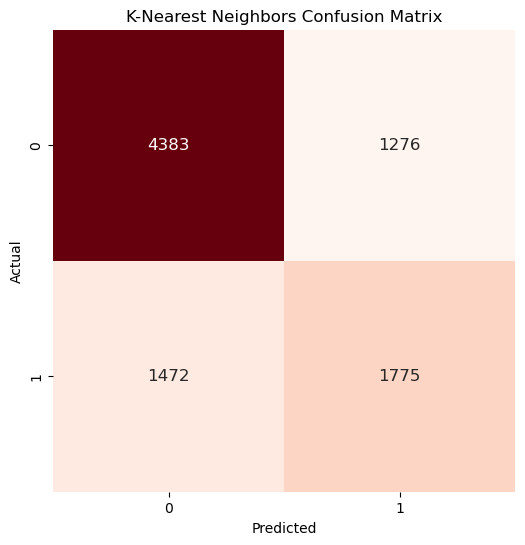

In [48]:
# Predict the labels for the test set
y_pred_knn = knn.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## FOURTH CLASSIFICATION ALGORITHM: NAYVE BAYES METHOD

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      5659
           1       0.59      0.65      0.62      3247

    accuracy                           0.71      8906
   macro avg       0.69      0.70      0.69      8906
weighted avg       0.72      0.71      0.71      8906



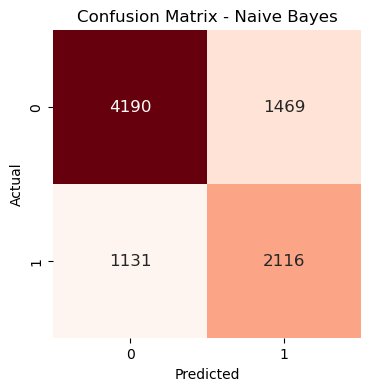

In [50]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
 
# Feature-target split
X = df.drop('smoking', axis=1)
y = df['smoking']
 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Initialize Bernoulli Naive Bayes model
bnb = BernoulliNB()
 
# Train the model
bnb.fit(X_train, y_train)
 
# Make predictions
y_pred = bnb.predict(X_test)
 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
 
# Classification report
print(classification_report(y_test, y_pred))
 
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
 
# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Ensemble learning techniques

## Stacking

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

Stacking Classifier Accuracy: 0.7301426805976856
Random Forest Classifier Accuracy: 0.7126
Gradient Boosting Classifier Accuracy: 0.7312


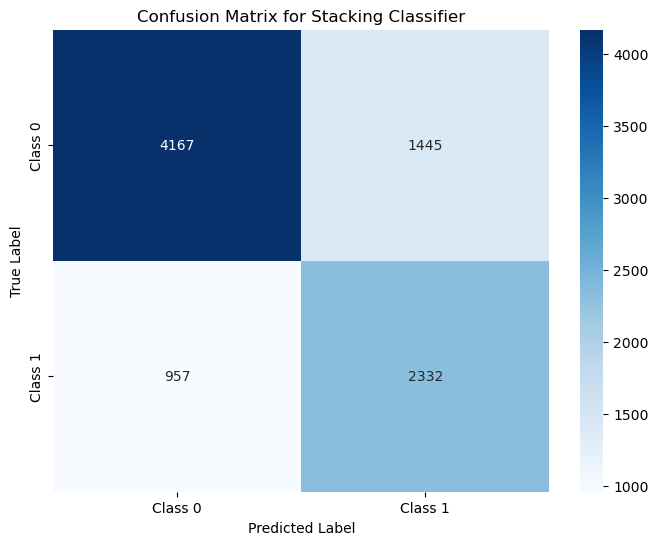

In [54]:
# Define a function for stacking classifier creation
def create_stacking_classifier():
    # Define base classifiers
    base_classifiers = [
        ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]

    # Define a more complex meta-classifier (we can switch between Logistic Regression and SVM)
    meta_classifier = LogisticRegression(max_iter=200)
    # To use SVM as meta-classifier, uncomment the following line:
    # meta_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

    # Create StackingClassifier
    stk = StackingClassifier(
        estimators=base_classifiers,
        final_estimator=meta_classifier,
        cv=10,  # 10-fold cross-validation for training
        n_jobs=-1  # Use all available cores for faster training
    )

    return stk

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df_x, scaled_df_y, test_size=0.2, random_state=42)

# Create the stacking classifier
stk_classifier = create_stacking_classifier()

# Train StackingClassifier
stk_classifier.fit(X_train, y_train)

# Make predictions on the test set
stk_pred = stk_classifier.predict(X_test)

# Evaluate the accuracy of the StackingClassifier
accuracy = accuracy_score(y_test, stk_pred)
print("Stacking Classifier Accuracy:", accuracy)

# Print the individual classifier accuracies
for name, clf in stk_classifier.named_estimators_.items():
    clf.fit(X_train, y_train)
    individual_pred = clf.predict(X_test)
    individual_accuracy = accuracy_score(y_test, individual_pred)
    print(f"{name} Classifier Accuracy: {individual_accuracy:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, stk_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Bagging

Accuracy: 0.7272


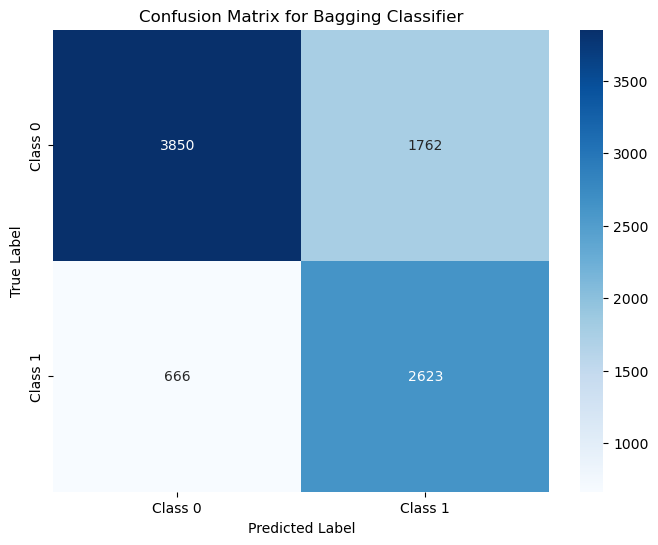

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_df_x, scaled_df_y, test_size=0.2, random_state=42)

def create_bagging_classifier():
    # Create a BaggingClassifier with a base DecisionTreeClassifier
    bagged_dt = BaggingClassifier(
        DecisionTreeClassifier(max_leaf_nodes=20, random_state=42, splitter='random'),
        n_estimators=1000,
        max_samples=100,
        bootstrap=True,
        random_state=42
    )
    return bagged_dt

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    # Display confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix for Bagging Classifier')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Create and evaluate the BaggingClassifier
bagging_model = create_bagging_classifier()
evaluate_model(bagging_model, X_train, y_train, X_test, y_test)

In [57]:
# Hyperparameter tuning using GridSearchCV for XGBoost

import xgboost as xgb

def tune_hyperparameters(X_train, y_train):
    # Define parameter grid for XGBoost
    # 'n_estimators' controls the number of boosting rounds (trees), higher values increase model complexity
    # 'max_depth' sets the maximum depth of individual trees, controlling the complexity of the model
    # 'learning_rate' adjusts the weight applied to each tree (smaller values make the model more robust but slower)
    # 'subsample' defines the fraction of samples used for training each tree, a value <1 reduces overfitting
    # 'colsample_bytree' specifies the fraction of features used for constructing each tree
    # 'gamma' controls the minimum loss reduction required for a split to occur, higher values make the model conservative
    # 'reg_alpha' is the L1 regularization term (Lasso), useful for feature selection
    # 'reg_lambda' is the L2 regularization term (Ridge), useful for reducing model complexity
    param_grid = {
        'n_estimators': [100, 500, 1000],        # Number of boosting rounds (trees)
        'max_depth': [3, 5, 7],                  # Maximum depth of the trees
        'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage (learning rate)
        'subsample': [0.8, 1.0],                 # Subsample ratio of the training data
        'colsample_bytree': [0.8, 1.0],          # Subsample ratio of features for each tree
        'gamma': [0, 1, 5],                      # Minimum loss reduction to make a split
        'reg_alpha': [0, 0.1, 1],                # L1 regularization term
        'reg_lambda': [1, 1.5, 2]                # L2 regularization term
    }

    # Initialize an XGBoost model with binary classification as the objective
    # 'random_state' ensures reproducibility of results
    xgboost_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

    # GridSearchCV to search for the best combination of hyperparameters
    # 'cv' sets the number of cross-validation folds to ensure the model generalizes well
    # 'scoring' defines accuracy as the metric to evaluate the model's performance
    # 'n_jobs=-1' uses all available CPU cores to speed up computation
    grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model using the training data
    grid_search.fit(X_train, y_train)
    
    # Output the best hyperparameters found during GridSearchCV
    print("Best Parameters: ", grid_search.best_params_)
    
    # Return the best model with tuned hyperparameters
    return grid_search.best_estimator_

# Get the best-tuned XGBoost model
# Here X_train and y_train are the input features and labels for training the model
tuned_model = tune_hyperparameters(X_train, y_train)

# The code gave the following results (runtime - 31:58)
# Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}

Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}


In [156]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

# Recreate the best-tuned model using the hyperparameters found earlier
best_xgboost_model = xgb.XGBClassifier(
    colsample_bytree=1.0, 
    gamma=5, 
    learning_rate=0.2, 
    max_depth=3, 
    n_estimators=1000, 
    reg_alpha=1, 
    reg_lambda=1, 
    subsample=0.8,
    objective='binary:logistic', 
    random_state=42
)

# Cross-validation to assess model generalization
def evaluate_model_with_cross_validation(X_train, y_train):
    """
    This function evaluates the XGBoost model using cross-validation
    to assess its performance and ability to generalize to new, unseen data.

    Arguments:
    - X_train: Features of the training dataset
    - y_train: Labels of the training dataset

    Returns:
    - Mean accuracy and standard deviation from the cross-validation
    """
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(best_xgboost_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Output cross-validation results
    print("Cross-Validation Accuracy Scores: ", cv_scores)
    print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))
    print("Standard Deviation of CV Accuracy: {:.4f}".format(cv_scores.std()))
    
    return cv_scores

# Evaluate the model
cv_scores = evaluate_model_with_cross_validation(X_train, y_train)

# Cross-Validation
# Here, we use StratifiedKFold cross-validation to ensure that each fold of the data
# preserves the percentage of samples for each class, making it particularly useful
# for imbalanced datasets.
# Cross-validation helps prevent overfitting and gives us a better sense of how the model will perform on unseen data

Cross-Validation Accuracy Scores:  [0.72275281 0.7252809  0.72247191 0.72247191 0.73230337]
Mean CV Accuracy: 0.7251
Standard Deviation of CV Accuracy: 0.0038


In [158]:
# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Step 1: Check the class distribution
print("Original class distribution:")
print(y_train.value_counts())

# Step 2: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("New class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 3: Train a new XGBoost model with the resampled data
xgboost_model = xgb.XGBClassifier(
    colsample_bytree=1.0, 
    gamma=5, 
    learning_rate=0.2, 
    max_depth=3, 
    n_estimators=1000, 
    reg_alpha=1, 
    reg_lambda=1, 
    subsample=0.8,
    objective='binary:logistic',
    random_state=42
)

# Step 4: Fit the model on the resampled data
xgboost_model.fit(X_resampled, y_resampled)

# Step 5: Evaluate the model on the original test set
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Handling Imbalanced Data
# Since the dataset is mildly imbalanced, we use SMOTE (Synthetic Minority Over-sampling Technique)
# to oversample the minority class. SMOTE generates synthetic samples based on the nearest neighbors
# of existing minority samples, helping the model to learn better.
# Other options include undersampling the majority class or using techniques like ensemble methods (e.g., balanced random forest).

Original class distribution:
smoking
0    22556
1    13044
Name: count, dtype: int64
New class distribution after SMOTE:
smoking
1    22556
0    22556
Name: count, dtype: int64
Accuracy on the test set: 0.7140770699921357


In [160]:
# Testing the new model
# Retrain the XGBoost model on the resampled data
# Define the XGBoost model with specific hyperparameters
# 'colsample_bytree' controls the fraction of features used for each tree
# 'gamma' sets the minimum loss reduction to make a split, making the model more conservative
# 'learning_rate' is the step size shrinkage to prevent overfitting (lower values slow down learning)
# 'max_depth' controls the depth of each tree, affecting model complexity
# 'n_estimators' is the number of boosting rounds (trees), higher values increase complexity
# 'reg_alpha' and 'reg_lambda' are regularization parameters (L1 and L2) to reduce overfitting
# 'subsample' is the fraction of samples used to grow trees, less than 1.0 reduces overfitting
# 'objective' is set to 'binary:logistic', appropriate for binary classification tasks
# 'random_state' ensures reproducibility
xgboost_model = xgb.XGBClassifier(
    colsample_bytree=1.0, 
    gamma=5, 
    learning_rate=0.2, 
    max_depth=3, 
    n_estimators=1000, 
    reg_alpha=1, 
    reg_lambda=1, 
    subsample=0.8,
    objective='binary:logistic',  # Binary classification problem
    random_state=42  # Reproducibility
)

# Fit the model on the resampled dataset (X_resampled and y_resampled)
# Resampling helps handle imbalanced datasets by either oversampling minority classes or undersampling majority classes
# The model is trained on this balanced dataset to improve performance on minority classes
xgboost_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [162]:
y_pred = xgboost_model.predict(X_resampled)

# Evaluate the model
accuracy = accuracy_score(y_resampled, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_resampled, y_pred))

Accuracy: 0.7724
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72     22556
           1       0.70      0.95      0.81     22556

    accuracy                           0.77     45112
   macro avg       0.81      0.77      0.76     45112
weighted avg       0.81      0.77      0.76     45112



## Feature Importance Analysis

       Feature  Importance
4       gender    0.935514
3          ALT    0.017626
5          age    0.016053
2   hemoglobin    0.009064
6       tartar    0.006854
1  Cholesterol    0.005503
7          BMI    0.004720
0   weight(kg)    0.004665


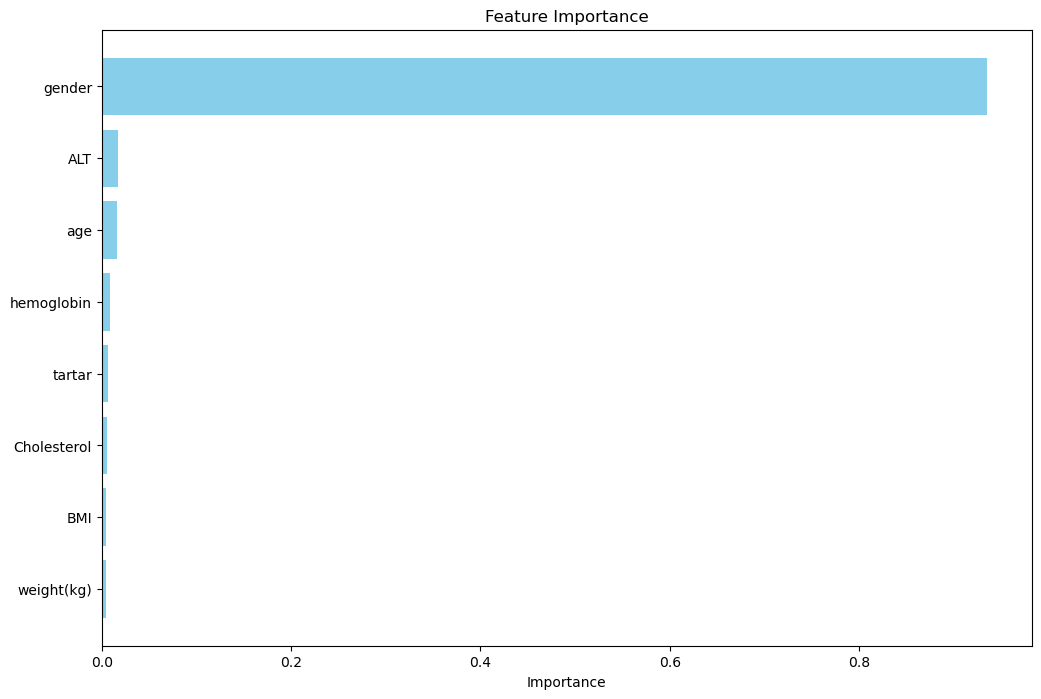

In [62]:
# Get feature importance from the trained XGBoost model
# 'feature_importances_' is an attribute of XGBoost models that gives importance scores for each feature
importance = xgboost_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
# 'X_resampled.columns' refers to the column names of the features used for training
# The DataFrame will have two columns: 'Feature' (feature names) and 'Importance' (corresponding importance scores)
feature_names = X_resampled.columns  # Use the columns from your input features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort the DataFrame by the 'Importance' column in descending order to rank features from most to least important
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame to see the ranked features along with their importance scores
print(importance_df)

# Plot feature importance as a horizontal bar chart for better visual interpretation
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')

# Invert the y-axis so that the most important feature appears at the top of the chart
plt.gca().invert_yaxis()

plt.show()

## Artificial Neural Network

In [65]:
# Imported MLPClassifier from sklearn.neural_network for building the artificial neural network
from sklearn.neural_network import MLPClassifier

### Single Hidden Layer

In [168]:
# Create an instance of the MLPClassifier with specified parameters
ann_single = MLPClassifier(learning_rate_init=0.2, 
                           max_iter=1000, 
                           random_state=42)

# Train the neural network on the training data
ann_single.fit(X_train, y_train)

# Evaluate the performance on the training and testing sets
test_score = ann_single.score(X_test, y_test)

# Print the accuracy scores
print("Test accuracy:", test_score)

Test accuracy: 0.5884732052578362


### Multiple Hidden Layers

In [69]:
# Create an instance of the MLPClassifier with specified parameters
# hidden_layer_sizes=(6, 3) means that there are two hidden layers in the neural network
#  The first hidden layer has 6 neurons, and the second hidden layer has 3 neurons
# Note: The learning_rate_init, max_iter, random_state, and hidden_layer_sizes are parameters you can experiment with
#  You might start experimenting with a single hidden layer and gradually increase the complexity by adding more layers
#  Neurons in a Layer: You might try to start with a small number and then increase it gradually
#    A common practice is to use a number between the input and output layer sizes
#    Be cautious about overfitting, especially if you have limited data. Too many neurons or layers might lead to overfitting
ann_multi = MLPClassifier(learning_rate_init=0.01, 
                          max_iter=1000, 
                          random_state=42,
                          hidden_layer_sizes=(6, 3))

# Train the neural network on the training data
ann_multi.fit(X_train, y_train)

# Evaluate the performance on the training and testing sets
test_score = ann_multi.score(X_test, y_test)

# Print the accuracy scores
print("Test accuracy:", test_score)

Test accuracy: 0.6304909560723514


In [70]:
print("The weights between the input and the first hidden layer:")
print(ann_multi.coefs_[0])
print("The weights between the first and the second hidden layer:")
print(ann_multi.coefs_[1])
print("The weights between the second hidden layer and the output:")
print(ann_multi.coefs_[2])

The weights between the input and the first hidden layer:
[[ 0.095147    0.34099434  0.02712514  0.09939676 -0.19556635 -0.40131918]
 [-0.46694189  0.08433449  0.02235738  0.05486785 -0.52407753  0.54513896]
 [ 0.68898511 -0.05797884 -0.68493377 -0.17071437 -0.00546855  0.05813028]
 [ 0.15366175  0.02159666 -0.11466898 -0.08092585 -0.03261056 -0.08297748]
 [-0.32022143  0.1923291  -0.11232435  0.08326666 -0.1367927  -0.763252  ]
 [-0.12008575 -0.09754309 -0.29110502  0.48761121  0.35564725  0.21225884]
 [-0.51381351 -0.16350367  0.51613186  0.07380201 -0.74445923 -0.16983723]
 [-0.35476768  0.30944791 -0.58655966  0.23887662  0.0032658   0.05185229]]
The weights between the first and the second hidden layer:
[[-8.78331396e-02  4.31491478e-01 -5.20632258e-01]
 [-2.78103457e-01 -2.55533840e-01 -2.41351850e-55]
 [-7.79944215e-02 -6.48933647e-01  2.73005513e-01]
 [-1.05479726e-01 -3.75428647e-01  1.33287104e-54]
 [-3.45020393e-01  2.55672605e-01 -5.41489088e-01]
 [ 3.98874542e-01  2.399151

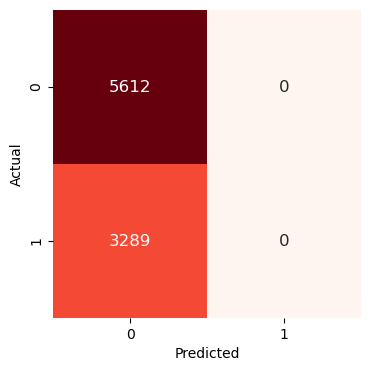

In [73]:
# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (ann_multi_pred)
ann_multi_pred = ann_multi.predict(X_test)
cm = confusion_matrix(y_test, ann_multi_pred)

# Creates a Pandas DataFrame df_cm to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

### Deep Neural Network with Keras

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

# Keras requires the output feature to be one-hot encoded values
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

In [76]:
# Specify to keras that we are creating model sequentially and the output of each layer we add is input to the next layer
dnn = Sequential()

# The dense layer is a neural network layer that is connected deeply
# which means each neuron in the dense layer receives input from all neurons of its previous layer
# dnn.add is used to add a layer to our neural network

# Create the first hidden layer of the neural network.
# The layer has 16 neurons 
# input_shape=(X.shape[1], ) indicates that the input to this layer is the number of features in the input data
# activation='relu' specifies the Rectified Linear Unit (ReLU) activation function
dnn.add(Dense(16, input_shape=(X_resampled.shape[1],), activation='relu'))
        
# This adds the second hidden layer to the neural network
# It has 8 neurons
# There is no need to specify the input shape in this layer because Keras can automatically infer it from the previous layer
# Again, the ReLU activation function is used
dnn.add(Dense(8, activation='relu'))
     
# This adds the output layer to the neural network
# It has 3 neurons, which is suitable for a classification task with three classes
# The activation function used here is 'softmax', which is often used when we have more than two classes 
# If we have two classes, we might use 'sigmoid' instead, making it suitable for binary classification tasks
dnn.add(Dense(2, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# Looking at the summary of the model
dnn.summary()

# Param #: This column shows the number of parameters (weights and biases) in each layer 
# These parameters are the variables that the neural network learns during training to make predictions.
# For a Dense layer, the number of parameters is calculated as input_dim * output_dim + output_dim
# Here, input_dim is the number of input features to the layer, and output_dim is the number of neurons in the layer.
# For example, in a Dense layer with 10 input features and 5 output neurons, 
# the number of parameters would be (10 * 5) + 5 = 55

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298 (1.16 KB)

 Trainable params: 298 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Configuring the learning process of a neural network model
# loss='categorical_crossentropy': Suitable when your target variable is one-hot encoded
# for example: Class A: [1, 0, 0], Class B: [0, 1, 0], Class C: [0, 0, 1]
# sparse_categorical_crossentropy: If your target variable is not one-hot encoded (i.e., it's represented as integers), 
# binary_crossentropy: Commonly used for binary classification problems
# optimizer='adam': This parameter specifies the optimization algorithm to be used during training. 
# Adam is a popular optimization algorithm that adapts the learning rates of each parameter during training
# metrics=['accuracy']: This parameter specifies the evaluation metric(s) to be used to monitor the performance
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
# Train a neural network model
# epochs=150: 150 times the model will be trained on the entire training dataset
# Too few epochs may result in underfitting, where the model hasn't learned the patterns in the data
# Too many epochs can lead to overfitting
# batch_size=10: During each iteration through the dataset (epoch), the data is divided into batches, 
# and the model's parameters are updated based on the error computed on each batch
# Smaller batch sizes may provide a regularizing effect and reduce overfitting
# Larger batch sizes can lead to faster convergence but may require more memory
dnn.fit(X_train, y_train_one_hot, epochs=30, batch_size=128)

# Small Datasets
# For small datasets, you might need more epochs and can use a smaller batch size. 
# Common choices might be 10 to 100 epochs with a batch size of 8 to 32
# Medium to Large Datasets
# For medium to large datasets, you may achieve good results with fewer epochs and larger batch sizes. 
# Common choices might be 5 to 30 epochs with a batch size of 32 to 128

Epoch 1/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.4794 - loss: 13501.5996
Epoch 2/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.5410 - loss: 379.6618
Epoch 3/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.5413 - loss: 326.3453
Epoch 4/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5482 - loss: 360.4399
Epoch 5/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.5555 - loss: 392.9657
Epoch 6/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.5561 - loss: 294.7971
Epoch 7/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.5617 - loss: 279.7578
Epoch 8/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.5572 - loss: 257.1117
Epoch 9/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5613 - loss: 324.8377
Epoch 10/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.5630 - loss: 288.6181
Epoch 11/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.5748 - loss: 249.6266
Epoch 

In [80]:
# Evaluate the performance of a trained neural network model
dnn.evaluate(X_test, y_test_one_hot)

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.5717 - loss: 53.3092


[51.35353088378906, 0.583080530166626]